✅ **Here’s a detailed summary of your text**, plus the plots (for covariance/correlation & feature selection vs extraction intuition) using Python & matplotlib.

---

# ✍️ Summary

### 🎯 Why do we perform dimensionality reduction?

1. **Prevent curse of dimensionality:**
   Too many features (dimensions) confuse the model, reduce accuracy & increase overfitting risk.
2. **Improve performance:**
   Fewer features = faster training & simpler mathematical computations.
3. **Visualization & understanding:**
   Humans can only visualize up to 3D. Reducing to 2D or 3D helps us plot & interpret data.

---

### 🔍 Feature Selection

* **Goal:** Select the most important existing features.

* **How?**

  * By measuring relationships (e.g., with covariance or correlation) to the target.
  * Drop features with low importance.

* **Example:**

  * Predicting house price:

    * House size ⬌ Price: strong linear relationship (keep it).
    * Fountain size ⬌ Price: no relationship (drop it).

---

### 🔍 Feature Extraction

* **Goal:** Create new features by combining existing ones to capture maximum variance or information.

* **How?**

  * Use transformations (like PCA).
  * Reduce 10-15 features to 2-3 derived features.

* **Example:**

  * Combine room size + number of rooms → get a new feature: estimated house size.
  * This new single feature still captures key info for predicting price.

---

### 🧮 Covariance & Correlation

* **Covariance** quantifies direction of relationship.

  * Positive → increase together.
  * Negative → one increases, other decreases.
  * Near 0 → no linear relationship.

$$
\mathrm{Cov}(X, Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

* **Pearson correlation (r)** standardizes covariance by dividing by product of standard deviations.

$$
r = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Gives a range \[-1, +1].

---

# 📊 Python plots for illustration

✅ Let’s generate:

* Scatter plots for:

  * Positive linear relationship
  * Negative linear relationship
  * No relationship
* Show correlation coefficient on them.

---


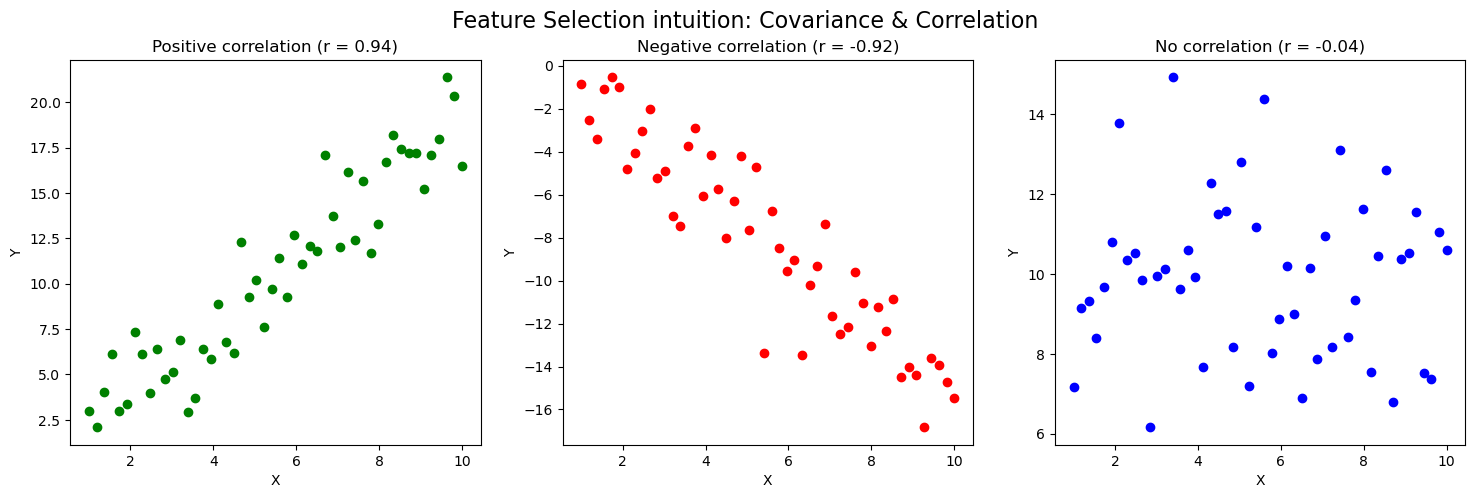

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sample data
np.random.seed(42)
x = np.linspace(1, 10, 50)

# 1. Positive linear relationship
y_pos = 2*x + np.random.normal(0, 2, len(x))

# 2. Negative linear relationship
y_neg = -1.5*x + np.random.normal(0, 2, len(x))

# 3. No relationship
y_none = np.random.normal(10, 2, len(x))

# Compute correlations
corr_pos = pearsonr(x, y_pos)[0]
corr_neg = pearsonr(x, y_neg)[0]
corr_none = pearsonr(x, y_none)[0]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(x, y_pos, color='green')
axs[0].set_title(f"Positive correlation (r = {corr_pos:.2f})")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].scatter(x, y_neg, color='red')
axs[1].set_title(f"Negative correlation (r = {corr_neg:.2f})")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

axs[2].scatter(x, y_none, color='blue')
axs[2].set_title(f"No correlation (r = {corr_none:.2f})")
axs[2].set_xlabel("X")
axs[2].set_ylabel("Y")

plt.suptitle("Feature Selection intuition: Covariance & Correlation", fontsize=16)
plt.show()


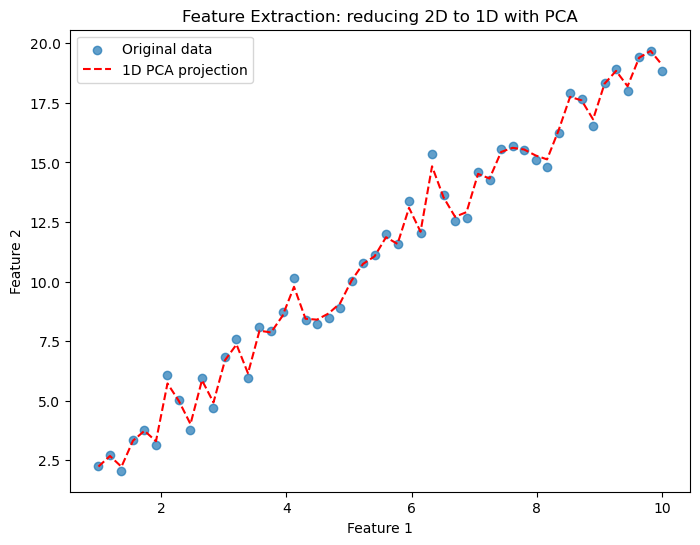

In [3]:

# ✂️ Feature Extraction intuition (PCA-like)

from sklearn.decomposition import PCA

# Create synthetic data with strong linear relationship
X_data = np.column_stack((x, 2*x + np.random.normal(0, 1, len(x))))

# Apply PCA
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X_data)

# Plot original 2D data and projection
plt.figure(figsize=(8,6))
plt.scatter(X_data[:,0], X_data[:,1], label="Original data", alpha=0.7)
plt.plot(X_data[:,0], pca.inverse_transform(X_reduced)[:,1], 'r--', label="1D PCA projection")
plt.title("Feature Extraction: reducing 2D to 1D with PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 🚀 What is PCA trying to do?

* PCA is a **dimensionality reduction technique**.
* It **extracts new features (principal components)** from original features so that:

  * fewer features (dimensions) are needed,
  * but most of the **information (variance)** in the data is still retained.

---

## 📈 Example intuition with house data

* Suppose we have:

  * **2 features**:

    * size of house
    * number of rooms
  * These are clearly related: bigger houses tend to have more rooms.

* The data, plotted in 2D, shows points aligned along a diagonal.

---

## 🔄 Naive dimensionality reduction by **feature selection**

* One way to reduce 2D → 1D is to **drop a feature** (say, number of rooms) and project all data onto just size.

* **Problem**:

  * This loses important information from the number of rooms.
  * Especially if there’s spread (variance) along that feature.

---

## 🔥 PCA’s smarter approach: **feature extraction with max variance**

* PCA **finds a new axis (PC1)** — a line in the 2D space — that:

  * captures the **maximum variance** in the data,
  * minimizes the information lost when projecting points onto this line.

* The data is then **projected onto this new axis**, converting 2D to 1D but keeping most variability.

* PCA then finds a **second axis (PC2)** orthogonal to PC1, which captures the next highest variance.

---

## ✨ Why does PCA do this?

* **Variance = information**.
* More variance along an axis → that axis captures more of the dataset’s structure.
* So projecting onto PC1 ensures **maximum spread is retained**, minimizing information loss.

---

## 🧭 Higher dimensions

* If we start with **3D data**:

  * PCA finds 3 principal components: PC1, PC2, PC3.
  * Typically:

    $$
    \text{Var(PC1)} > \text{Var(PC2)} > \text{Var(PC3)}
    $$
* If we want to reduce to 1D, we keep PC1.
* To reduce to 2D, we keep PC1 & PC2.

---

## 🏗 How does PCA do it?

* It uses a **mathematical transformation** based on:

  * **Eigen decomposition** of the covariance matrix.
  * This gives new axes (principal components) that best capture variance.

---

## 📝 In short:

✅ **PCA’s main goal:**

> Find the best line(s) (principal components) in the data space, along which projections capture **maximum variance**, ensuring minimal information loss when reducing dimensions.



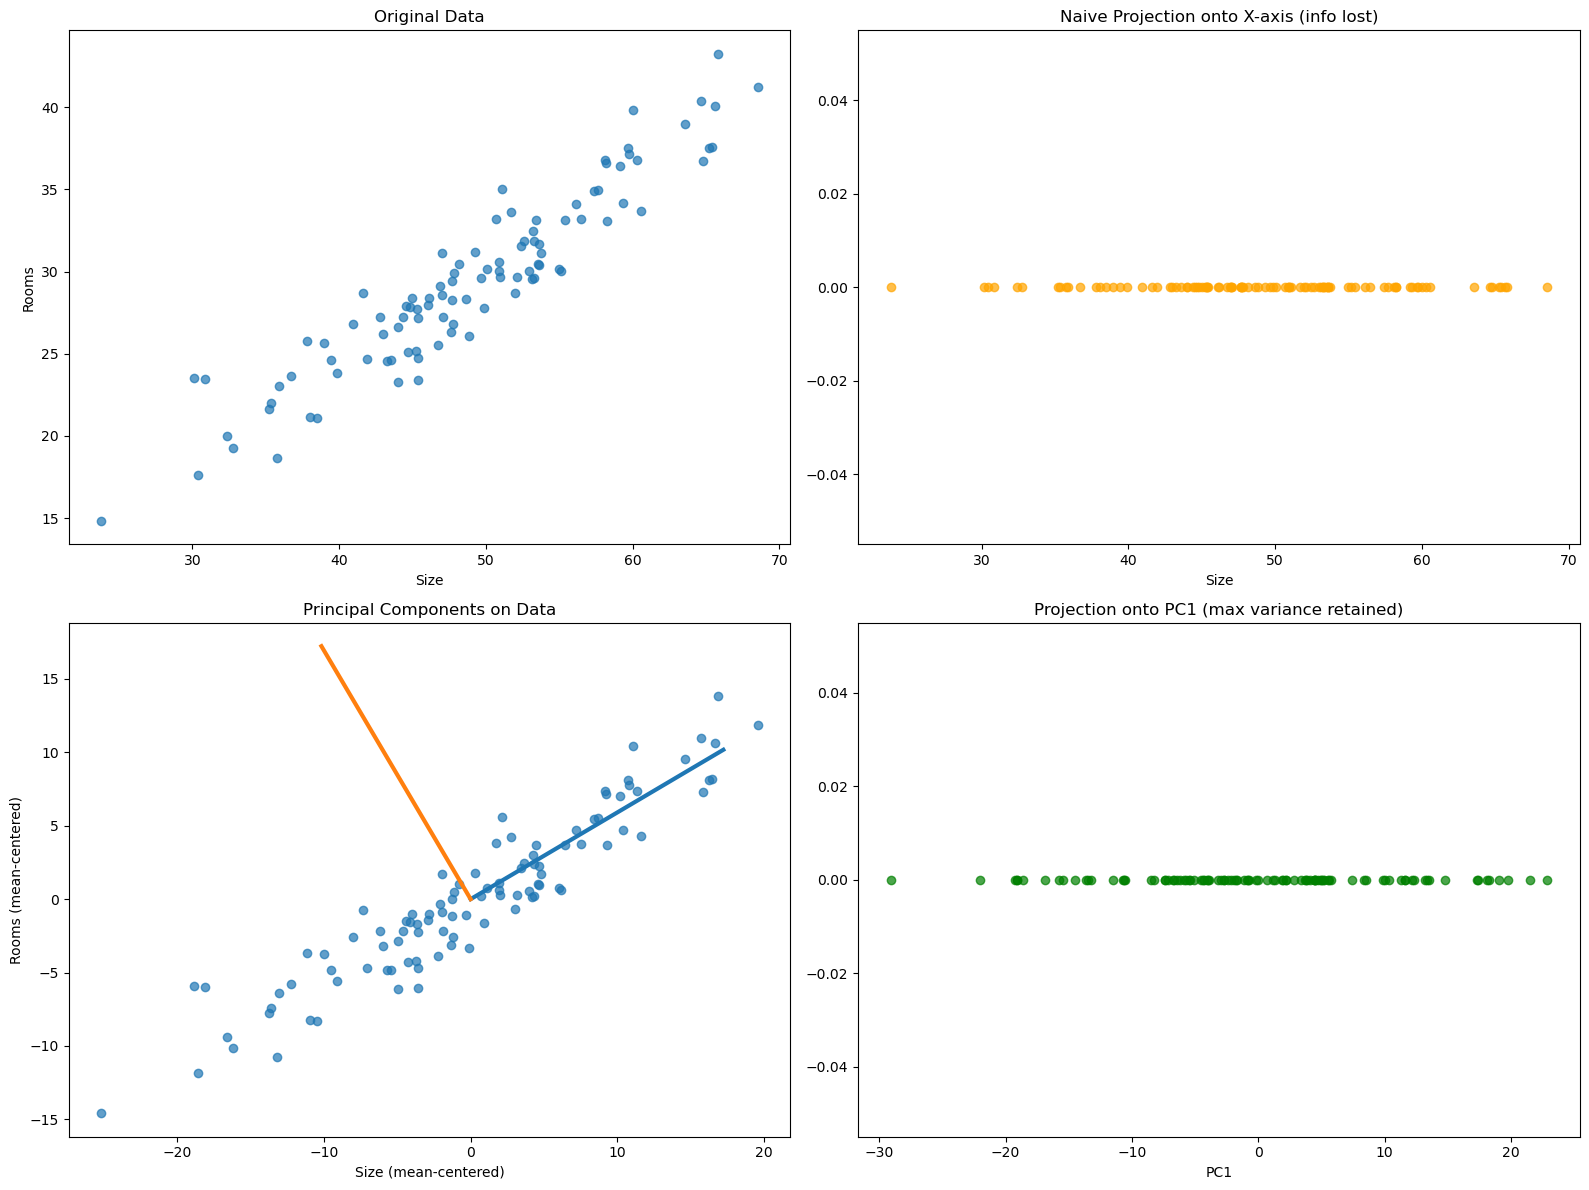

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic 2D data (correlated)
np.random.seed(42)
size = np.random.normal(50, 10, 100)
rooms = size * 0.6 + np.random.normal(0, 2, 100)

X = np.vstack((size, rooms)).T

# PCA manual calculation
X_mean = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_mean.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues (descending)
idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:, idx]

# Project data onto first principal component
pc1 = eig_vectors[:, 0]
X_pca = X_mean @ pc1

# Plot original data
plt.figure(figsize=(16, 12))

# Original scatter plot
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.xlabel("Size")
plt.ylabel("Rooms")
plt.title("Original Data")

# Naive projection onto X-axis
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), alpha=0.7, color='orange')
plt.xlabel("Size")
plt.title("Naive Projection onto X-axis (info lost)")

# PCA axis on original data
plt.subplot(2, 2, 3)
plt.scatter(X_mean[:, 0], X_mean[:, 1], alpha=0.7)
origin = np.mean(X, axis=0)
for length, vector in zip(eig_values, eig_vectors.T):
    v = vector * 20
    plt.plot([0, v[0]], [0, v[1]], linewidth=3)
plt.title("Principal Components on Data")
plt.xlabel("Size (mean-centered)")
plt.ylabel("Rooms (mean-centered)")

# Data projected onto PC1
plt.subplot(2, 2, 4)
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7, color='green')
plt.xlabel("PC1")
plt.title("Projection onto PC1 (max variance retained)")

plt.tight_layout()
plt.show()
